In [1]:
import pandas as pd

# Load the dataset
crypto_df = pd.read_csv('crypto_market_data.csv')

# Display summary statistics
crypto_df.describe()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [2]:
from sklearn.preprocessing import StandardScaler

# Select numeric columns for scaling
features = crypto_df.drop(columns=["coin_id"])
scaler = StandardScaler()
scaled_data = scaler.fit_transform(features)

# Create DataFrame with scaled data and set 'coin_id' as index
scaled_df = pd.DataFrame(scaled_data, index=crypto_df['coin_id'], columns=features.columns)

# Display the first 5 rows of the scaled DataFrame
scaled_df.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


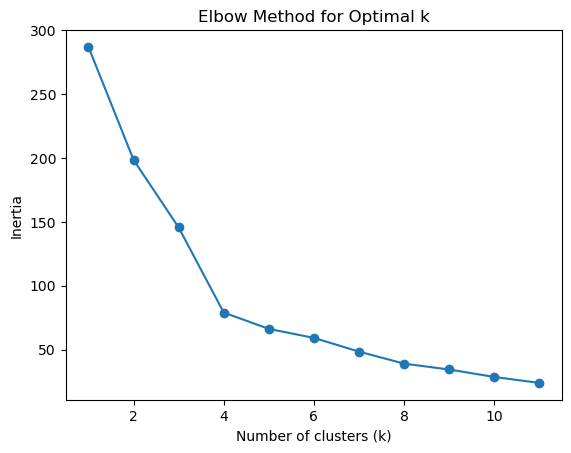

In [3]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Elbow method to find the best k
inertia = []
k_values = list(range(1, 12))

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


In [4]:
# Assume the best k found was 4 (adjust according to the elbow plot)
k = 4
kmeans = KMeans(n_clusters=k, random_state=0)
clusters = kmeans.fit_predict(scaled_df)

# Add clusters to the scaled DataFrame
scaled_df['Cluster'] = clusters

# Visualize clusters
import hvplot.pandas

scaled_df.hvplot.scatter(x='price_change_percentage_24h', 
                         y='price_change_percentage_7d', 
                         by='Cluster', 
                         hover_cols=['coin_id'], 
                         title='Cryptocurrency Clusters (k=4)')


:NdOverlay   [Cluster]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

In [5]:
from sklearn.decomposition import PCA

# Reduce to 3 principal components
pca = PCA(n_components=3)
pca_data = pca.fit_transform(scaled_df.drop(columns=["Cluster"]))

# Explained variance
explained_variance = pca.explained_variance_ratio_
total_explained_variance = sum(explained_variance)

print(f'Total explained variance: {total_explained_variance}')

# Create DataFrame with PCA data
pca_df = pd.DataFrame(pca_data, index=scaled_df.index, columns=["PC1", "PC2", "PC3"])

# Display the first 5 rows
pca_df.head()


Total explained variance: 0.8950316570309842


,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


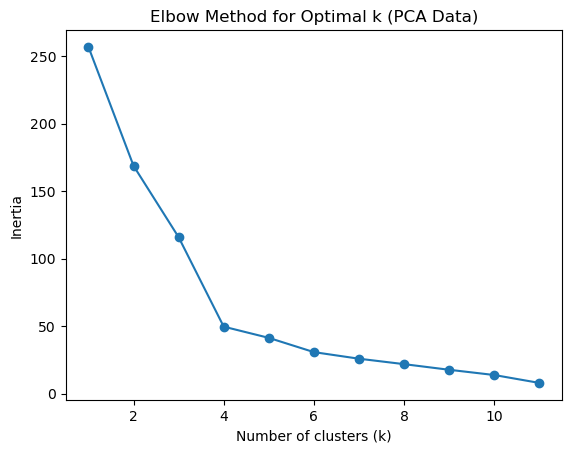

:NdOverlay   [Cluster]
   :Scatter   [PC1]   (PC2,coin_id)

In [6]:
# Elbow method for PCA data
inertia_pca = []

for k in k_values:
    kmeans_pca = KMeans(n_clusters=k, random_state=0)
    kmeans_pca.fit(pca_df)
    inertia_pca.append(kmeans_pca.inertia_)

# Plot elbow curve for PCA data
plt.plot(k_values, inertia_pca, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k (PCA Data)')
plt.show()

# Assuming the best k is found (e.g., 3)
k_pca = 3
kmeans_pca = KMeans(n_clusters=k_pca, random_state=0)
clusters_pca = kmeans_pca.fit_predict(pca_df)

# Add clusters to PCA DataFrame
pca_df['Cluster'] = clusters_pca

# Plot clusters using hvPlot
pca_df.hvplot.scatter(x='PC1', 
                      y='PC2', 
                      by='Cluster', 
                      hover_cols=['coin_id'], 
                      title='Cryptocurrency Clusters with PCA (k=3)')
